In [ ]:
# download ktrain
!pip install ktrain

#import ktrain and the ktrain.text modules
import ktrain
from ktrain import text

In [ ]:
# read the dataset
import pandas as pd
from sklearn.model_selection import train_test_split

train_dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")
valid_dataset = pd.read_csv("val.csv")

list_dataset = [train_dataset, test_dataset, valid_dataset]

dataset = pd.concat(list_dataset)

Xfeatures = dataset['Text']
ylabels = dataset['Emotion']

#  Split Data
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.1, random_state=41)

# convert pandas series to list
x_train = x_train.tolist()
x_test = x_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
# Create a Transformer instance
MODEL_NAME = 'distilbert-base-uncased'
MAX_LEN = 256 # maximum sequence length. The longest sequence in our training set is 47.
class_names = ['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']
t = text.Transformer(MODEL_NAME, MAX_LEN, class_names=class_names)

In [ ]:
# Preprocess the Datasets
trn = t.preprocess_train(x_train, y_train)
val = t.preprocess_test(x_test, y_test)

In [ ]:
# Create a Model and Wrap in Learner
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=12)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
1046/1046 [==============================] - 345s 318ms/step - loss: 1.3405 - accuracy: 0.5139
Epoch 2/2
1046/1046 [==============================] - 330s 316ms/step - loss: 1.7864 - accuracy: 0.3100


done.
Visually inspect loss plot and select learning rate associated with falling loss


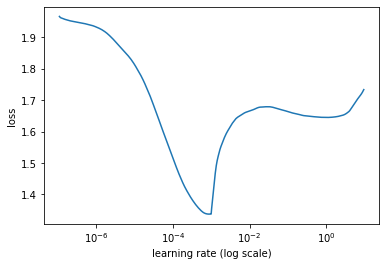

In [ ]:
# Estimate a Good Learning Rate
learner.lr_find(show_plot=True, max_epochs=2)

In [ ]:
# Train Model
learner.fit_onecycle(5e-5, 6)



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/6
1047/1047 [==============================] - 348s 324ms/step - loss: 0.7910 - accuracy: 0.7296 - val_loss: 0.2331 - val_accuracy: 0.9191
Epoch 2/6
1047/1047 [==============================] - 340s 323ms/step - loss: 0.2026 - accuracy: 0.9277 - val_loss: 0.2154 - val_accuracy: 0.9191
Epoch 3/6
1047/1047 [==============================] - 340s 323ms/step - loss: 0.1495 - accuracy: 0.9406 - val_loss: 0.1993 - val_accuracy: 0.9112
Epoch 4/6
1047/1047 [==============================] - 340s 323ms/step - loss: 0.1166 - accuracy: 0.9487 - val_loss: 0.1609 - val_accuracy: 0.9219
Epoch 5/6
1047/1047 [==============================] - 340s 323ms/step - loss: 0.0779 - accuracy: 0.9638 - val_loss: 0.1917 - val_accuracy: 0.9198
Epoch 6/6
1047/1047 [==============================] - 341s 323ms/step - loss: 0.0396 - accuracy: 0.9814 - val_loss: 0.2051 - val_accuracy: 0.9262


In [ ]:
# Evaluate/Inspect Model
learner.validate(class_names = class_names)

44/44 [==============================] - 6s 89ms/step
              precision    recall  f1-score   support

       anger       0.89      0.92      0.91       182
        fear       0.85      0.89      0.87       157
         joy       0.95      0.96      0.95       492
        love       0.84      0.87      0.85       112
     sadness       0.97      0.95      0.96       396
    surprise       0.91      0.72      0.80        57

    accuracy                           0.93      1396
   macro avg       0.90      0.88      0.89      1396
weighted avg       0.93      0.93      0.93      1396



array([[168,   4,   3,   0,   7,   0],
       [ 10, 139,   0,   0,   5,   3],
       [  2,   1, 470,  18,   0,   1],
       [  0,   0,  15,  97,   0,   0],
       [  8,   5,   4,   1, 378,   0],
       [  0,  14,   1,   0,   1,  41]])

In [ ]:
# the one we got most wrong
learner.view_top_losses(n=1, preproc=t)

44/44 [==============================] - 4s 84ms/step
----------
id:1000 | loss:9.22 | true:anger | pred:joy)



In [ ]:
# Make Predictions on New Data
predictor = ktrain.get_predictor(learner.model, preproc=t)
predictor.predict("I can't imagine how hard it must be for you.")

1/1 [==============================] - 0s 70ms/step


'sadness'

# Save Model

In [ ]:
# save Predictor (i.e., model and Preprocessor instance) after partially training
predictor.save("/saved_model")

# Load Model

In [ ]:
# reload Predictor and extract model
#model = ktrain.load_predictor('/content/saved_model')